# Wine Quality

Practice example from: https://www.simplilearn.com/tutorials/data-science-tutorial/random-forest-in-r 

# Import and Explore Data

In [1]:
wine <- read.csv(url("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"), header = TRUE, sep = ";") 

head(wine)

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


In [2]:
t(do.call(cbind, lapply(wine, summary)))

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.
fixed.acidity,4.60000,7.1000,7.90000,8.31963727,9.200000,15.90000
volatile.acidity,0.12000,0.3900,0.52000,0.52782051,0.640000,1.58000
citric.acid,0.00000,0.0900,0.26000,0.27097561,0.420000,1.00000
residual.sugar,0.90000,1.9000,2.20000,2.53880550,2.600000,15.50000
chlorides,0.01200,0.0700,0.07900,0.08746654,0.090000,0.61100
free.sulfur.dioxide,1.00000,7.0000,14.00000,15.87492183,21.000000,72.00000
total.sulfur.dioxide,6.00000,22.0000,38.00000,46.46779237,62.000000,289.00000
density,0.99007,0.9956,0.99675,0.99674668,0.997835,1.00369
pH,2.74000,3.2100,3.31000,3.31111320,3.400000,4.01000
sulphates,0.33000,0.5500,0.62000,0.65814884,0.730000,2.00000


## Check Missing Values

In [3]:
cbind(colSums(is.na(wine)))

fixed.acidity,0
volatile.acidity,0
citric.acid,0
residual.sugar,0
chlorides,0
free.sulfur.dioxide,0
total.sulfur.dioxide,0
density,0
pH,0
sulphates,0
alcohol,0


No missing values - good!

## Check Distributions

Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'Hmisc'

The following objects are masked from 'package:base':

    format.pval, units



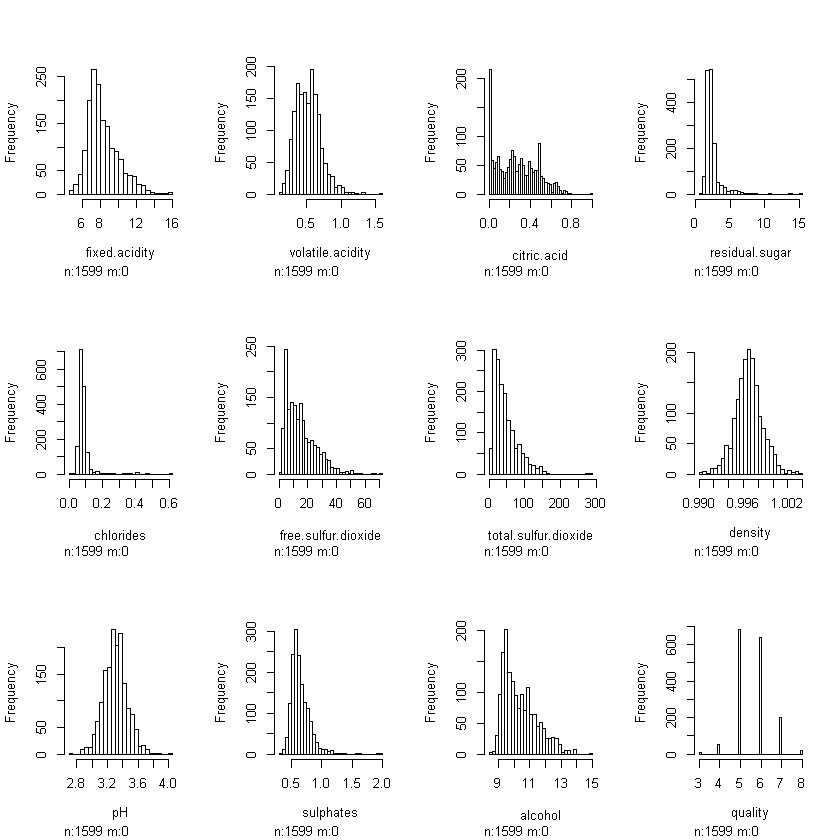

In [4]:
library(Hmisc)

hist.data.frame(wine)

Not all variables are normally distributed. This would cause problems with regression models.

## Check Correlations
Use Pearson's Correlation Coefficient to check for correlations between the continuous-valued independent variables.

corrplot 0.84 loaded


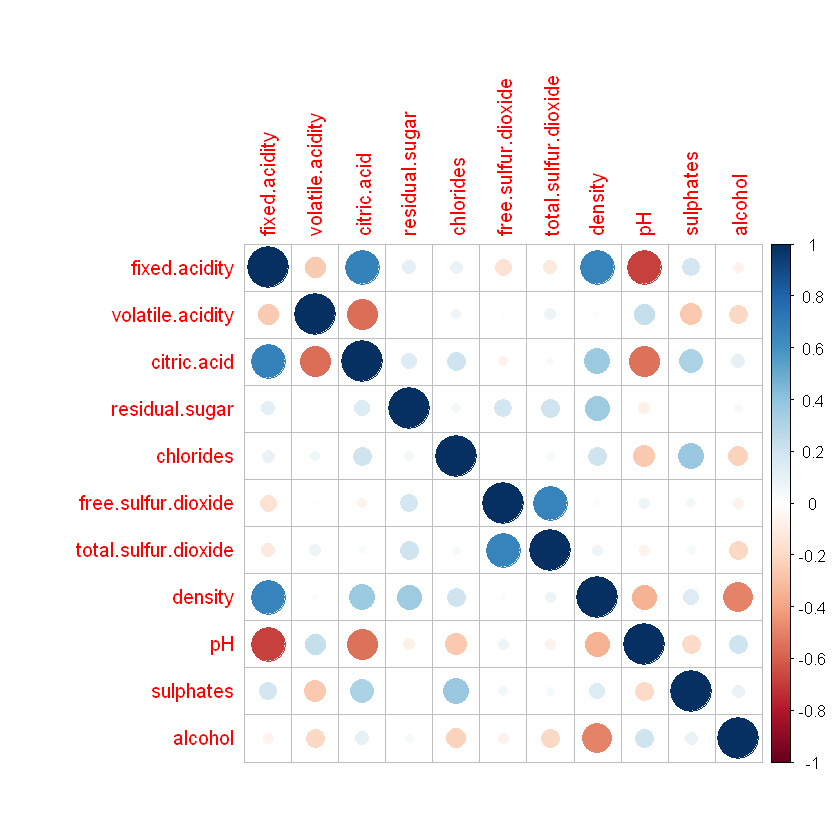

In [5]:
library(corrplot)

corrplot(cor(wine[, !(colnames(wine) == "quality")]))

In [23]:
cor(wine[, !(colnames(wine) == "quality")])

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
fixed.acidity,1.00000000,-0.256130895,0.67170343,0.114776724,0.093705186,-0.153794193,-0.11318144,0.66804729,-0.68297819,0.183005664,-0.06166827
volatile.acidity,-0.25613089,1.000000000,-0.55249568,0.001917882,0.061297772,-0.010503827,0.07647000,0.02202623,0.23493729,-0.260986685,-0.20228803
citric.acid,0.67170343,-0.552495685,1.00000000,0.143577162,0.203822914,-0.060978129,0.03553302,0.36494718,-0.54190414,0.312770044,0.10990325
residual.sugar,0.11477672,0.001917882,0.14357716,1.000000000,0.055609535,0.187048995,0.20302788,0.35528337,-0.08565242,0.005527121,0.04207544
chlorides,0.09370519,0.061297772,0.20382291,0.055609535,1.000000000,0.005562147,0.04740047,0.20063233,-0.26502613,0.371260481,-0.22114054
free.sulfur.dioxide,-0.15379419,-0.010503827,-0.06097813,0.187048995,0.005562147,1.000000000,0.66766645,-0.02194583,0.07037750,0.051657572,-0.06940835
total.sulfur.dioxide,-0.11318144,0.076470005,0.03553302,0.203027882,0.047400468,0.667666450,1.00000000,0.07126948,-0.06649456,0.042946836,-0.20565394
density,0.66804729,0.022026232,0.36494718,0.355283371,0.200632327,-0.021945831,0.07126948,1.00000000,-0.34169933,0.148506412,-0.49617977
pH,-0.68297819,0.234937294,-0.54190414,-0.085652422,-0.265026131,0.070377499,-0.06649456,-0.34169933,1.00000000,-0.196647602,0.20563251
sulphates,0.18300566,-0.260986685,0.31277004,0.005527121,0.371260481,0.051657572,0.04294684,0.14850641,-0.19664760,1.000000000,0.09359475


Some independent variables are correlated with eachother. This may cause problems with model buidling.

Typically Spearman's Rank Correlation would be used to measure correlation between all continuous-ordinal pairings (independent-dependent variables), but becaue this data has so many ties between rankings of wines, Kendall's Tau will be used instead. Kendall's Tau is designed to handle ties.

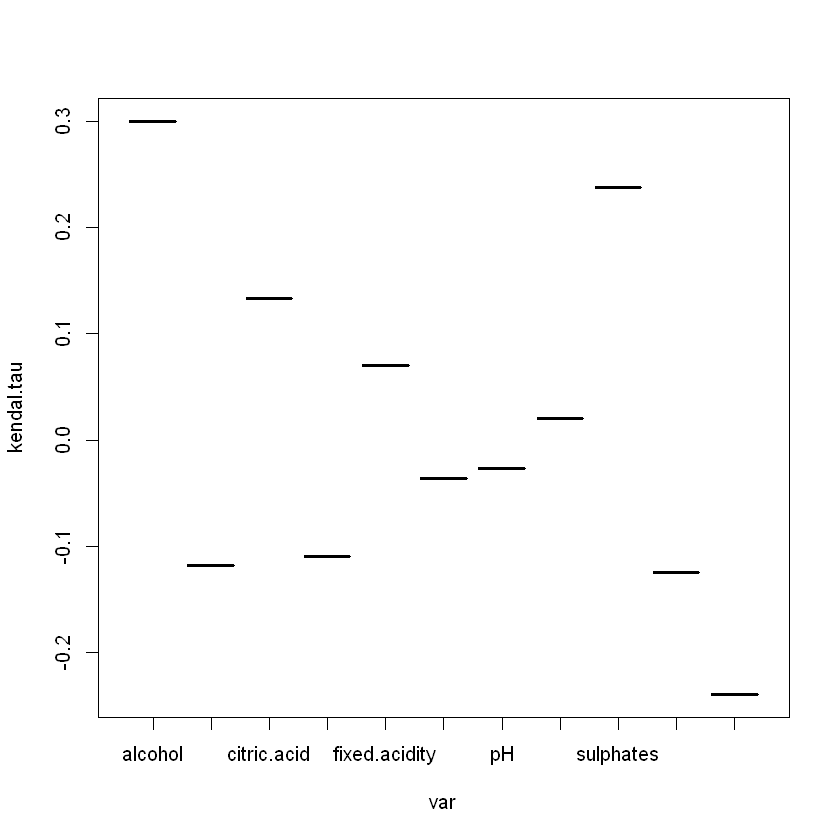

In [20]:
library(VGAM)

var <- names(wine)[1:11]
kendal.tau <- rep(NA, 11)

for (i in 1:11) {
    kendal.tau[i] <- kendall.tau(wine[, var[i]], as.numeric(wine$quality), exact = TRUE)
}

kendal.tau <- data.frame(var, kendal.tau)

plot(kendal.tau)

None of the independent variables are strongly correlated with wine quality.

# Prepare Data for Model
Convert the quality values into factors.

In [25]:
wine$quality <- as.ordered(wine$quality)

## Split Data Into Training and Testing

In [26]:
set.seed(123)
samp <- sample(nrow(wine), 0.8 * nrow(wine))
train <- wine[samp, ]
test <- wine[-samp, ]

# Build Model

In [66]:
library(randomForest)

model <- randomForest(quality ~ ., data = train, ntree = 1000, mtry = 5, Importance = TRUE)

model


Call:
 randomForest(formula = quality ~ ., data = train, ntree = 1000,      mtry = 5, Importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 5

        OOB estimate of  error rate: 31.2%
Confusion matrix:
  3 4   5   6  7 8 class.error
3 0 1   6   1  0 0   1.0000000
4 1 0  28  14  1 0   1.0000000
5 0 1 428  99  4 0   0.1954887
6 0 0 110 359 38 0   0.2919132
7 0 0   9  68 93 2   0.4593023
8 0 0   0   9  7 0   1.0000000

In [69]:
importance(model)

,MeanDecreaseGini
fixed.acidity,58.31509
volatile.acidity,84.26400
citric.acid,59.35079
residual.sugar,60.13725
chlorides,66.95977
free.sulfur.dioxide,53.99645
total.sulfur.dioxide,89.52003
density,70.93215
pH,61.76724
sulphates,91.99784


## Model Accuracy

In [30]:
library(caret)

# Make predictions
predictions <- predict(model, newdata = test)

confusionMatrix(predictions, test$quality)

Confusion Matrix and Statistics

          Reference
Prediction   3   4   5   6   7   8
         3   0   0   0   0   0   0
         4   0   0   0   0   0   0
         5   1   7 116  30   0   0
         6   1   2  30  95  11   1
         7   0   0   3   6  16   0
         8   0   0   0   0   0   1

Overall Statistics
                                          
               Accuracy : 0.7125          
                 95% CI : (0.6595, 0.7615)
    No Information Rate : 0.4656          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5129          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 3 Class: 4 Class: 5 Class: 6 Class: 7 Class: 8
Sensitivity           0.00000  0.00000   0.7785   0.7252  0.59259 0.500000
Specificity           1.00000  1.00000   0.7778   0.7619  0.96928 1.000000
Pos Pred Value            NaN      NaN   0.7532

In [45]:
data.frame(train.proportion=summary(train$quality) * 100 / length(train$quality), test.proportion=summary(test$quality) * 100 / length(test$quality))

,train.proportion,test.proportion
3,0.6254887,0.6250
4,3.4401876,2.8125
5,41.5949961,46.5625
6,39.6403440,40.9375
7,13.4480063,8.4375
8,1.2509773,0.6250


In [48]:
group <- c(rep("Prediction", length(predictions)), 
           rep("Actual", length(test$quality)))

outcomes <- data.frame(values=c(as.numeric(prediction), as.numeric(test$quality)), group)
head(outcomes)

values,group
3,Prediction
3,Prediction
3,Prediction
3,Prediction
3,Prediction
3,Prediction


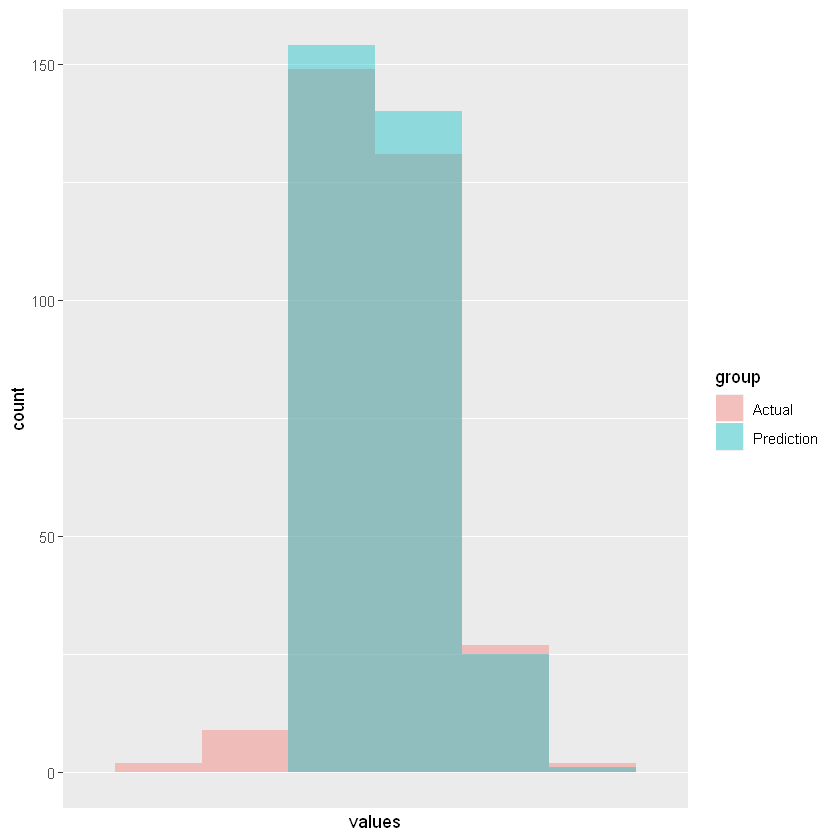

In [65]:
library(ggplot2)

ggplot(outcomes, aes(x=values, fill=group)) +
  geom_histogram(position = "identity", alpha = 0.4, bins = 6) +
  scale_x_discrete(labels= c('1'='3', '2'='4', '3'='5', '4'='6', '5'='7', '6'='8'))
  #axis(1, at=1:12, labels=c(3, 4, 5, 6, 7, 8))

The model is overpredicting qualities 3, 4 and underpredicting all others.

# Conclusion
Overall model performance seems good - accuracy is 90%, but the model does a poor job of correctly classifying 'bad' tasting wine (sensitivity = 9%) and only a moderate job at correctly classifying 'good' wine (sensitivity = 62%). The model seems to be favoring the prediction of 'normal' taste, which is expected since that class is overrepresented. If the model decided to predict all test data as 'normal' it would have an accuracy of 87.5%, only slightly less than the score it actually achieved.

This model would be best suited for predicting which wines have 'normal' taste.

## Reference
True Positive (for Class X): Number of subject which have been correctly classified as class x.  
All Positives (for Class X): Number of subjects actually in class x.  
True Negatives (for Class X): Number of subjects which have been correctly classified as not class x.  
All Negatives (for Class X): Number of subjects actually not in class X.

$$
\text{Sensitivity} = \frac{\text{True Positives}}{\text{All Positives}}
$$
$$
\text{Specificity} = \frac{\text{True Negatives}}{\text{All Negatives}}
$$